In [666]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [667]:
# Extract Raw Data

file_path = 'airqualityCH.dat'

raw_df = pd.read_csv(file_path, sep=r"\s+")
print(raw_df.head())

y_df = raw_df.pop('pollution')

y = y_df.values
X = raw_df.values

print(X, X.shape)
print(y, y.shape)

    pollution  traffic_emission      wind  humidity
0  170.870757       1579.028194  0.919270  0.528885
1  314.435641       3247.416899  1.016043  0.622445
2  270.923154       3206.756484  1.094309  0.695256
3  178.922489       2799.180582  1.238099  0.300246
4  168.370975       3181.681775  2.213807  0.099476
[[ 1.57902819e+03  9.19270222e-01  5.28885369e-01]
 [ 3.24741690e+03  1.01604251e+00  6.22445310e-01]
 [ 3.20675648e+03  1.09430930e+00  6.95256136e-01]
 ...
 [ 2.83009987e+03  5.86334545e-01  2.35074934e-02]
 [ 5.10928373e+02  6.68378913e+00  1.15387453e-02]
 [ 2.65568565e+02  9.42882094e+00 -8.82895371e-02]] (2000, 3)
[170.87075674 314.4356414  270.92315448 ... 184.37957144   9.76429577
   6.09033193] (2000,)


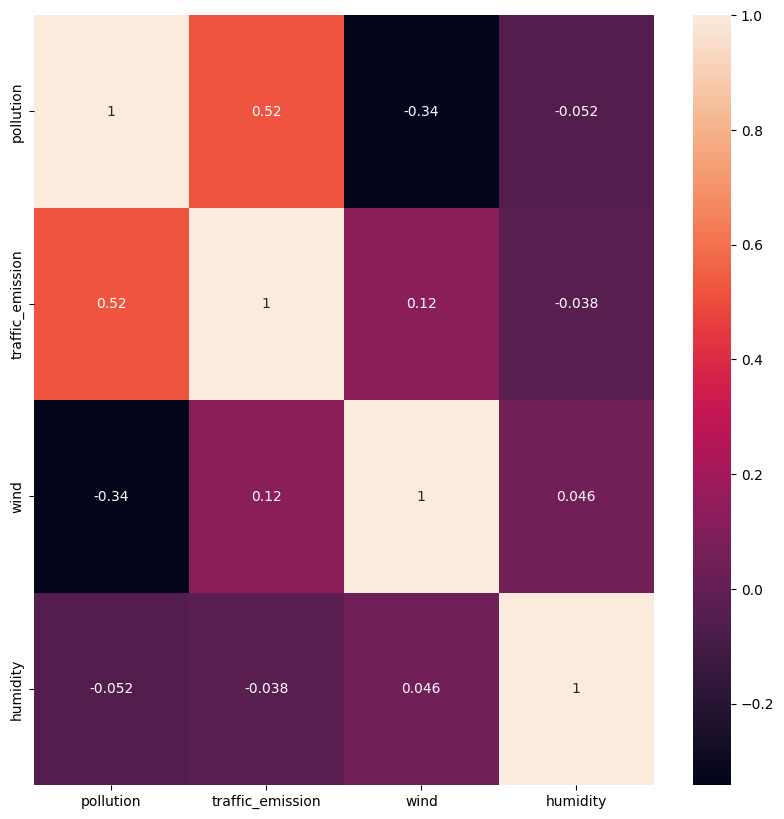

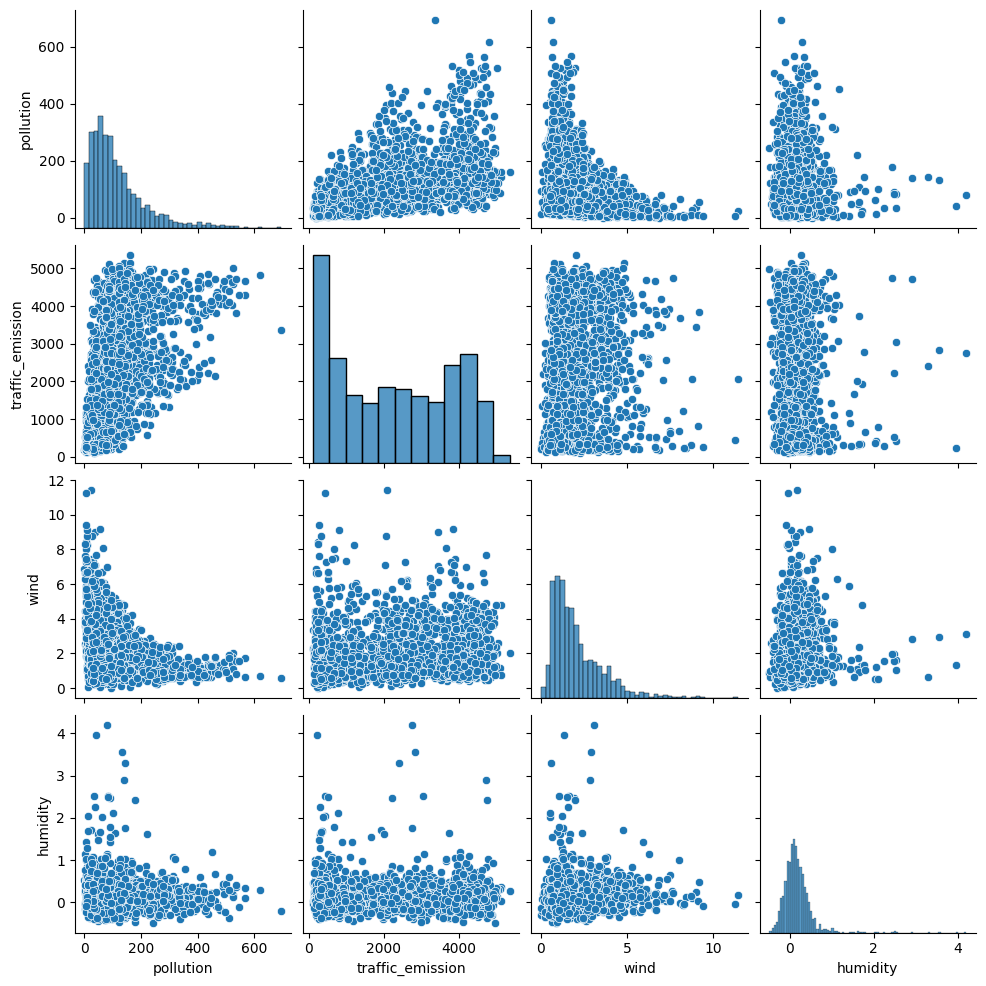

In [668]:
# Plot correlation heatmap and pair-plot

import seaborn as sns

plt.figure(figsize = (10, 10))
sns.heatmap(pd.concat([y_df, raw_df], axis=1).corr(), annot = True)
sns.pairplot(pd.concat([y_df, raw_df], axis=1))


In [ ]:
# Standardise data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [670]:
# Add interaction and square terms

from sklearn.preprocessing import PolynomialFeatures

feature_names = raw_df.columns.tolist()
poly = PolynomialFeatures(degree=2, include_bias=False)
X_proc = poly.fit_transform(X)

full_feature_names = poly.get_feature_names_out(feature_names)
proc_df = pd.DataFrame(X_proc, columns=full_feature_names)
proc_df = pd.concat([y_df,proc_df], axis=1)


In [671]:
# plt.figure(figsize = (10, 10))
# sns.heatmap(proc_df.corr(), annot = True)
# sns.pairplot(proc_df)

In [672]:
import statsmodels.api as sm 

X = sm.add_constant(X)
result = sm.OLS(y, X).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     517.1
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          1.37e-248
Time:                        16:48:13   Log-Likelihood:                -11440.
No. Observations:                2000   AIC:                         2.289e+04
Df Residuals:                    1996   BIC:                         2.291e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.7705      3.680     24.934      0.0

In [673]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True).fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.43731613578955275
[  0.           0.03635209 -27.67898145  -3.16957818]
91.77054187540335


In [674]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.001, fit_intercept=True)
clf.fit(X, y)
print(clf.score(X, y))
print(clf.coef_)
print(clf.intercept_)

0.4373161349376766
[  0.           0.03635212 -27.67860318  -3.16171374]
91.76828963058955


Backward Elimination
Lasso

Plots:

X_i vs residualscfor all i
y_hat vs residuals
index (time) vs residuals
qqplot


Outliers?